In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-production-data/cpdata.csv


In [2]:
df = pd.read_csv('/kaggle/input/crop-production-data/cpdata.csv')

In [3]:
df.sample(6)

,temperature,humidity,ph,rainfall,label
2397,27.237083,82.945733,6.224543,70.425089,grapes
1201,23.222819,70.071477,5.070481,278.307588,Rubber
1233,22.091044,71.068652,5.749470,230.610213,Rubber
685,21.797926,63.730861,6.250994,46.623702,Lentil
1968,53.833292,64.735711,6.864201,104.220644,Adzuki Beans
2062,28.092690,44.933220,4.895927,197.114401,Pigeon Peas


In [4]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# Some Feature Engineering
#df['state'] = df.ph.apply(lambda x : 1 if x<7.0 else 0)

In [6]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
# scaling , ohencoding,

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df.drop(['label'],axis=1))

In [8]:
fin_df = pd.DataFrame(x,columns = ['Temprature','Humidity','PH','Rainfall'])

In [9]:
df.append?

In [10]:
lab = df.label
values = lab.values

In [11]:
fin_df['Label'] = values

In [12]:
fin_df.head()

,Temprature,Humidity,PH,Rainfall,Label
0,-0.823351,0.666453,0.165655,1.447924,rice
1,-0.705610,0.596335,0.826819,1.818328,rice
2,-0.542493,0.679702,1.817879,2.400929,rice
3,-0.081608,0.589616,0.755533,2.071435,rice
4,-0.922434,0.649878,1.556268,2.381457,rice


In [13]:
fin_df.describe()

,Temprature,Humidity,PH,Rainfall
count,3.100000e+03,3.100000e+03,3.100000e+03,3.100000e+03
mean,-3.405654e-16,-3.986775e-16,8.847224e-16,6.208296e-16
std,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00
min,-2.416732e+00,-2.331763e+00,-3.538857e+00,-1.405438e+00
25%,-5.681324e-01,-4.482779e-01,-5.851266e-01,-7.074514e-01
50%,-1.329288e-01,1.239476e-01,-3.261257e-02,-2.054388e-01
75%,2.983677e-01,7.682609e-01,5.840545e-01,4.840507e-01
max,3.685125e+00,1.415464e+00,4.406244e+00,4.483296e+00


In [14]:
plt.scatter?

Object `plt.scatter` not found.


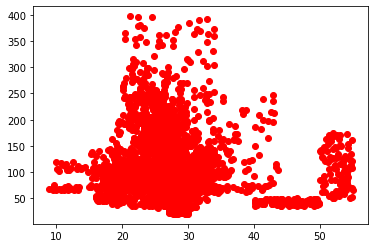

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x=df['temperature'],y=df['rainfall'],c='r')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fin_df.drop('Label',axis=1), fin_df.Label, test_size=0.33)

In [17]:
X_train.head()

,Temprature,Humidity,PH,Rainfall
1321,0.173529,0.563206,0.145529,1.010094
2765,-1.837391,1.167412,-0.018398,-0.061579
227,0.104149,0.946203,0.513055,-0.818486
2222,-0.260618,0.786484,-0.214693,-0.292772
435,2.516673,-2.240954,1.047150,-1.001676


In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)


SVC()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='kd_tree')
knn.fit(X_train,y_train)
knn_pres = knn.predict(X_test)

In [20]:
y_pred = svc.predict(X_test)

In [21]:
X_test.head()

,Temprature,Humidity,PH,Rainfall
2464,-0.427826,1.020423,-0.601420,-0.111780
1021,0.566371,0.142232,-0.054855,-0.508553
31,-0.651565,0.596820,-0.014239,1.403462
1530,-0.343052,-1.882617,-0.863475,-0.718603
694,-0.838155,-0.087639,-0.003160,-0.972636


In [22]:
y_pred

array(['apple', 'Ground Nut', 'rice', ..., 'Jute', 'Tea', 'Coconut'],
      dtype=object)

In [23]:
sklearn.metrics.accuracy_score(actuals, y_pred)

NameError: name 'sklearn' is not defined

In [24]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, mean_squared_error

In [25]:
import sklearn
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
xgb_model = xgb.XGBClassifier(param,n_jobs=1).fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
actuals = y_test

print(sklearn.metrics.accuracy_score(actuals, predictions))


0.9305962854349951


In [26]:
import pickle 
  
 # Save the trained model as a pickle string. 
with open("knn","wb") as f:
     pickle.dump(knn,f)

In [27]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(fin_df.drop('Label',axis=1), fin_df.Label, test_size=0.33)
kf = KFold(n_splits=2, shuffle=True)
xgb_model = xgb.XGBClassifier( n_jobs=1,n_estimators=1000,learning_rate=0.05,objective='multi:softprob',colsample_bytree=0.8, reg_alpha=0.005).fit(X_train, y_train,eval_metric="rmse")
predictions = xgb_model.predict(X_test)
actuals = y_test
print(sklearn.metrics.accuracy_score(actuals, predictions))

0.9217986314760508


In [28]:
saved = xgb_model.save_model('Json_Model.json')

In [29]:
print(saved)

None


Feature: 0, Score: 0.20319
Feature: 1, Score: 0.34883
Feature: 2, Score: 0.16112
Feature: 3, Score: 0.28686


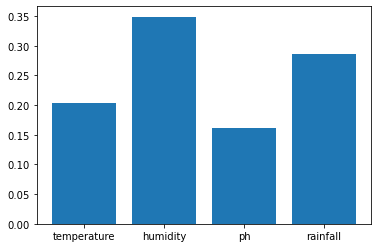

In [30]:
from matplotlib import pyplot
importance = xgb_model.feature_importances_
importance_label  = df.drop('label',axis=1).columns
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(importance_label, importance)
pyplot.show()

In [31]:
importance_label  = df.drop('label',axis=1).columns

In [32]:
importance_label

Index(['temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [33]:
def save_model_to_db(model, client, db, dbconnection, model_name):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({model_name: pickled_model, 'name': model_name, 'created_time':time.time()})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details

In [34]:
# import pickle 
  
# # Save the trained model as a pickle string. 
# saved_model = pickle.dump(xgb_model,'filename.pkl','wb') 
  
# # Load the pickled model 
# Pickle = pickle.loads(saved_model) 
  
# # Use the loaded pickled model to make predictions 


In [35]:
# pickle.dump?

In [36]:
# with open("Model_Pickle","wb") as f:
#     pickle.dump(xgb_model,f)

In [37]:
# AdaBoostClassifier?

In [38]:
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier(learning_rate=0.1,n_estimators=1000).fit(X_train, y_train)
# predictions = ada.predict(X_test)
# actuals = y_test

# print(sklearn.metrics.accuracy_score(actuals, predictions))
